# Notebook Transaksi Kartu Ramayana Makmur Sentosa Playzone Tahun 2024 - 2025

## Data Wrangling

Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Kita pakai Plotly agar grafik interaktif (cocok buat Streamlit)
import re
import matplotlib.ticker as ticker

Load Data

In [67]:
# Konfigurasi tampilan pandas
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# LOAD DATA
# Pastikan file ini adalah hasil output dari script terakhir Anda
file_path = "DETAIL_PAKET_TRANSAKSI_GABUNGAN.xlsx"
df = pd.read_excel(file_path)

print(f"Data Loaded: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Data Loaded: 37537 baris, 9 kolom


,Folder_Asal,Nama_Toko_Internal,Tahun,Bulan,Tipe_Kartu,Paket,Frekuensi,Total_Sales,Masuk_Kredit
0,R015 Dewi Sartika,Dewi Sartika Bogor,2024,Januari,Kiddie Land,FINTECH KIDDIE ZONE WEEKEND SEPUASNYA,2,90000,90000
1,R015 Dewi Sartika,Dewi Sartika Bogor,2024,Januari,Kiddie Land,KIDDIE ZONE WEEKDAY 1 JAM + KKP,68,2040000,2040000
2,R015 Dewi Sartika,Dewi Sartika Bogor,2024,Januari,Kiddie Land,KIDDIE ZONE WEEKDAY SEPUASNYA + KKP,17,680000,680000
3,R015 Dewi Sartika,Dewi Sartika Bogor,2024,Januari,Kiddie Land,KIDDIE ZONE WEEKEND 1 JAM + KK ANAK,330,11550000,11550000
4,R015 Dewi Sartika,Dewi Sartika Bogor,2024,Januari,Kiddie Land,KIDDIE ZONE WEEKEND SEPUASNYA + KK ANAK,107,4815000,4815000


* Folder_Asal = Nama Toko Standar
* Nama_Toko_Internal = Nama Toko di Server
* Tahun = Tahun transaksi kartu terjadi
* Bulan = Bulan transaksi kartu terjadi
* Paket = Nama paket top up kartu playzone
* Frekuensi = Banyaknya transaksi yang terjadi pada suatu paket
* Total_Sales = Jumlah pendapatan dari paket yang terjual
* Masuk_Kredit = Jumlah kredit yang masuk ke kartu dari paket yang dibeli oleh pembeli

Assesing Data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37537 entries, 0 to 37536
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Folder_Asal         37537 non-null  object
 1   Nama_Toko_Internal  37537 non-null  object
 2   Tahun               37537 non-null  int64 
 3   Bulan               37537 non-null  object
 4   Tipe_Kartu          37537 non-null  object
 5   Paket               37537 non-null  object
 6   Frekuensi           37537 non-null  int64 
 7   Total_Sales         37537 non-null  int64 
 8   Masuk_Kredit        37537 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.6+ MB


Dataframe df memiliki 37582 entry data. Setiap kolom memiliki jumlah yang sama sehingga tidak ada data yang hilang. Untuk kolom tahun dan bulan masih berbentuk integer dan object sehingga perlu preprocessing menjadi datetime agar dapat difilter nantinya.

*Pemeriksaan parameter statistik*

In [69]:
df.describe()

,Tahun,Frekuensi,Total_Sales,Masuk_Kredit
count,"37,537.00","37,537.00","37,537.00","37,537.00"
mean,"2,024.49",99.78,"2,137,303.85","4,841,932.78"
std,0.50,224.84,"7,082,734.35","11,601,255.31"
min,"2,024.00",1.00,0.00,0.00
25%,"2,024.00",4.00,0.00,"200,000.00"
50%,"2,024.00",22.00,0.00,"1,066,000.00"
75%,"2,025.00",92.00,"1,029,000.00","4,415,000.00"
max,"2,025.00","5,837.00","189,900,000.00","291,850,000.00"


Kolom Total_Sales dan Masuk_Kredit memiliki null (0) value sehingga perlu diproses karena akan mengakibatkan kesalahan dalam visualisasi dan analisis.

## Data Cleaning & Preprocessing

Pemeriksaan duplikasi

In [70]:
print("Jumlah data duplikat dari df:", df.duplicated().sum())

Jumlah data duplikat dari df: 73


Ada data duplikat, maka perlu dihandle.

In [71]:
df_clean = df.drop_duplicates()

Cek kembali duplikat.

In [72]:
print("Jumlah data duplikat dari df setelah dihandle:", df_clean.duplicated().sum())

Jumlah data duplikat dari df setelah dihandle: 0


Handle missing values

In [73]:
cols_numeric = ['Frekuensi', 'Total_Sales', 'Masuk_Kredit']
df_clean[cols_numeric] = df_clean[cols_numeric].fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4066378391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols_numeric] = df_clean[cols_numeric].fillna(0)


Hapus value yang pada kolom total_sales dan masuk_kredit dua duanya 0

In [74]:

# Cek jumlah baris awal
print(f"Total Baris Awal: {len(df_clean)}")

# LOGIKA FILTERING:
# Ambil baris HANYA JIKA (Total_Sales TIDAK 0) ATAU (Masuk_Kredit TIDAK 0)
# Tanda | berarti "ATAU"
df_clean = df_clean[
    (df_clean['Total_Sales'] != 0) | 
    (df_clean['Masuk_Kredit'] != 0)
].copy()

# Cek hasil setelah dibuang
print(f"Total Baris Bersih: {len(df_clean)}")

Total Baris Awal: 37464
Total Baris Bersih: 35638


Buat Kolom Omset_Paket 

In [75]:
#Ambil Total_Sales. Jika 0, baru ambil Masuk_Kredit.
df_clean['Omset_Paket'] = np.where(
    df_clean['Total_Sales'] != 0,  # Kondisi: Apakah Sales ada isinya?
    df_clean['Total_Sales'],       # Jika YA: Ambil Sales
    df_clean['Masuk_Kredit']       # Jika TIDAK: Ambil Kredit
)

# Cek hasil untuk memastikan tidak ada penjumlahan
print("✅ Kolom 'Omset_Paket' berhasil diperbarui (Logika Tempel).")
print("\nSampel Data (Cek variasi nilai):")
display(df_clean[['Paket', 'Total_Sales', 'Masuk_Kredit', 'Omset_Paket']].sample(10))

✅ Kolom 'Omset_Paket' berhasil diperbarui (Logika Tempel).

Sampel Data (Cek variasi nilai):


,Paket,Total_Sales,Masuk_Kredit,Omset_Paket
31331,ISI ULANG KIDDIE LAND 1 JAM 20.000+KAOS KAKI,0,195000,195000
22055,Kartu Baru Zone Rp.50 Rb s/d Rp.99 Rb,0,9320000,9320000
12120,KIDDIE LAND KARTU BARU 1 JAM RP. 35000,0,2310000,2310000
29738,PAKET KARTU BARU KIDDIELAND WEEKDAY SP,0,3332000,3332000
32430,ISI ULANG 100K BNS 70% + FNB,13559000,13559000,13559000
8657,ISI ULANG KIDDIELAND WEEKDAY 1 JAM,3640000,3640000,3640000
904,ISI ULANG KARTU 10 - 49RB,6863000,6863000,6863000
20148,ISI ULANG 50K + 80% + FRUITEA,0,1189000,1189000
2643,BARU/ISI ULANG 50 K FRUIT TEA + BONUS 27 POIN,0,13325000,13325000
11148,PAKET SALDO ISI ULANG Rp.50RB BNS MKNN/MNMN,1148000,1148000,1148000


Mengecek informasi umum dataframe setelah dilakukan penanganan data duplikat

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35638 entries, 0 to 37536
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Folder_Asal         35638 non-null  object
 1   Nama_Toko_Internal  35638 non-null  object
 2   Tahun               35638 non-null  int64 
 3   Bulan               35638 non-null  object
 4   Tipe_Kartu          35638 non-null  object
 5   Paket               35638 non-null  object
 6   Frekuensi           35638 non-null  int64 
 7   Total_Sales         35638 non-null  int64 
 8   Masuk_Kredit        35638 non-null  int64 
 9   Omset_Paket         35638 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.0+ MB


Terdapat pengurangan banyaknya data menjadi 35638

Cleaning data waktu agar datetime

Mapping Bulan dan Tahun ke Tanggal (datetime) agar mudah dikategorikan

In [77]:
# Standardisasi Nama Bulan ---
# Pastikan nama bulan konsisten (Title Case: Januari, bukan januari)
# Menggunakan df_clean
df_clean['Bulan'] = df_clean['Bulan'].astype(str).str.title()

# Mapping Bulan Indonesia ke Angka (Untuk bikin tanggal)
map_bulan = {
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4,
    'Mei': 5, 'Juni': 6, 'Juli': 7, 'Agustus': 8,
    'September': 9, 'Oktober': 10, 'November': 11, 'Desember': 12
}

df_clean['Bulan_Angka'] = df_clean['Bulan'].map(map_bulan)

# Membuat Kolom Tanggal (Date) ---
# Kita set tanggal 1 sebagai default karena data kita bulanan
# Menggunakan df_clean.Tahun dan df_clean.Bulan_Angka
df_clean['Tanggal'] = pd.to_datetime(dict(year=df_clean.Tahun, month=df_clean.Bulan_Angka, day=1))

# Filter Data Aneh (Optional) ---
# Contoh: Hapus jika Total_Sales negatif (jika perlu)
# df_clean = df_clean[df_clean['Total_Sales'] >= 0] 

print("Rentang Data:", df_clean['Tanggal'].min(), "sampai", df_clean['Tanggal'].max())
df_clean.info()

Rentang Data: 2024-01-01 00:00:00 sampai 2025-11-01 00:00:00
<class 'pandas.core.frame.DataFrame'>
Index: 35638 entries, 0 to 37536
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Folder_Asal         35638 non-null  object        
 1   Nama_Toko_Internal  35638 non-null  object        
 2   Tahun               35638 non-null  int64         
 3   Bulan               35638 non-null  object        
 4   Tipe_Kartu          35638 non-null  object        
 5   Paket               35638 non-null  object        
 6   Frekuensi           35638 non-null  int64         
 7   Total_Sales         35638 non-null  int64         
 8   Masuk_Kredit        35638 non-null  int64         
 9   Omset_Paket         35638 non-null  int64         
 10  Bulan_Angka         35638 non-null  int64         
 11  Tanggal             35638 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(5)
memo

Mapping Kategori Paket

In [78]:
print("\n=== FREKUENSI PAKET ===")
pd.set_option('display.max_rows', None) # Agar bisa scroll sampai bawah
display(df_clean['Paket'].value_counts())
pd.reset_option('display.max_rows') # Kembalikan ke setting awal


=== FREKUENSI PAKET ===


Paket
PAKET KARTU 100rb + BONUS 100% + 4 SOSRO              155
Isi Ulang Zone Rp.30 Rb s/d Rp.49 Rb                  149
PAKET KARTU 50rb + BONUS 15% + 2 SOSRO                148
PAKET KARTU 30Rbu                                     145
PAKET KARTU KIDDIELAND SEPUASNYA                      139
PAKET KARTU 50Rbu + BONUS 30%                         136
PAKET KARTU 50rb + BONUS 100% + 2 SOSRO               131
PAKET KARTU 100Rbu + BONUS 50%                        130
PAKET KARTU 25Rbu                                     115
PAKET KARTU KIDDIELAND SEPUASNYA WEEKEND              112
PAKET KARTU KIDDIELAND 1 JAM WEEKDAY                  111
Isi Ulang Zone Rp.10 Rb s/d Rp.29 Rb                  107
PAKET KARTU KIDDIELAND 1 JAM WEEKEND                   98
PAKET KARTU 30rb + BONUS 15% + 1 SOSRO                 98
PAKET KARTU 30K                                        93
PAKET KARTU 50rb + BONUS 30%                           88
PAKET KARTU 100rb + BONUS 50%                          83
PAKET BU

Fungsi Mapping

Kode ini mencakup:

* Ekstraksi Nominal: Mendeteksi angka (20rb, 50k, 100.000, dst).

* Kategorisasi Tipe: Memisahkan antara "Kiddie Land", "Bundling F&B", dan "Regular".

* Penggabungan: Membuat kolom akhir yang rapi.

In [ ]:
# ================= 1. FUNGSI EKSTRAK NOMINAL (FINAL V4) =================
def ekstrak_nominal_final(teks):
    """
    Mendeteksi nominal uang dengan logika:
    1. Hapus persen (%).
    2. Cek Konteks (NEW/ZONE/HARGA) dengan batas kata (\b) agar KIDDIEZONE aman.
    3. Cek 'k'/'rb'.
    4. Cek Format Rupiah Standar.
    5. Ambil yang paling depan (First Match).
    """
    t_raw = str(teks).lower()
    
    # 1. Bersihkan angka persen (misal 100%)
    t = re.sub(r'\d+\s*%', '', t_raw)
    
    found_candidates = [] 

    # 2. Pola Kontekstual (NEW 65, ZONE 100)
    # Pakai \b agar 'KIDDIEZONE' tidak dianggap 'ZONE'
    pola_context = re.finditer(r'\b(?:new|zone|harga|isi ulang)\s*(?:rp\.?)?\s*(\d{2,3})\b', t)
    for match in pola_context:
        angka = int(match.group(1))
        if 10 <= angka <= 999: # Filter angka masuk akal
            found_candidates.append((match.start(), angka * 1000))

    # 3. Pola 'k' / 'rb' (50k, 100rb)
    pola_k = re.finditer(r'(\d+)\s*(k|rb|ribu)', t)
    for match in pola_k:
        found_candidates.append((match.start(), int(match.group(1)) * 1000))

    # 4. Pola Rupiah Lengkap (150.000, 500000)
    pola_angka = re.finditer(r'(?:rp\.?)?\s*(\d{1,3}(?:\.\d{3})+|\d{4,})', t)
    for match in pola_angka:
        val = int(match.group(1).replace('.', '').replace(',', ''))
        if val >= 5000: # Filter angka qty/tahun
            found_candidates.append((match.start(), val))

    # 5. Ambil Kandidat Paling Depan
    if not found_candidates:
        return 'Lainnya'
    
    found_candidates.sort(key=lambda x: x[0])
    nilai_final = found_candidates[0][1]
    
    # Formatting
    if nilai_final >= 1000000: return f"{int(nilai_final/1000)}k" 
    elif nilai_final >= 1000: return f"{int(nilai_final/1000)}k"
    else: return str(nilai_final)

# ================= 2. FUNGSI CEK TIPE (FINAL PRIORITY) =================
def cek_tipe_paket_final(teks):
    t = str(teks).lower()
    
    # Prioritas 1: KARTU PERDANA
    keyword_perdana = ['perdana', 'kartu baru', 'new card', 'starter']
    if any(k in t for k in keyword_perdana): return 'Kartu Perdana'

    # Prioritas 2: KIDDIE LAND (Termasuk KIDDIEZONE)
    if 'kiddie' in t or 'kiddy' in t or re.search(r'\bkl\b', t): return 'Kiddie Land'
    
    # Prioritas 3: BUNDLING F&B
    keyword_fnb = [
        'bundling', 'fruitea', 'fruit tea', 'kentang', 'ayam', 'kupon', 'tbk',
        'sosro', 'teh', 'fanta', 'sprite', 'cola', 'minum', 'drink', 'bottle',
        'popcorn', 'pop corn', 'corn', 'ice', 'krim', 'cream', 'cone', 'milo',
        'nugget', 'sosis', 'bakso', 'fish', 'roll', 'ball', 'wings', 
        'dumpling', 'odeng', 'bento', 'milky', 'snack', 'platter',
        'minyak', 'gula', 'chiki', 'oreo', 'biskitop', 'kusuka', 'yupi',
        'balon', 'kaos kaki', 'fnb', 'meal', 'makan', 'nyemil', 'biskuit',
        'pakan', 'boneka', 'merchandise', 'hampers', 'hadiah', 'box',
        'mineral', 'capucino', 'prima', 'goreng', 'kepang'
    ]
    if any(k in t for k in keyword_fnb): return 'Bundling F&B/Barang'
    
    # Prioritas 4: BUNDLING WAHANA
    keyword_wahana = [
        'driving', 'school', 'bumper', 'car', 'atv', 'golf', 'soccer', 'padel',
        'bouncer', 'human', 'claw', 'blowing', 'photobox', 'photo', 'booth',
        'karaoke', 'makeup', 'face', 'painting', 'pijat', 'massage', 'snow',
        'train', 'chocho', 'robot', 'zoomove', 'walking', 'game', 'play', 'kursi pijat'
    ]
    if any(k in t for k in keyword_wahana): return 'Bundling Wahana'

    # Prioritas 5: BONUS
    if 'bonus' in t or ' bns ' in t or 'free' in t: return 'Regular Top Up dengan Bonus'

    return 'Regular Top Up'

# ================= 3. FUNGSI GROUPING FINAL =================
def final_grup_logic(row):
    if row['Tipe_Grup'] == 'Kiddie Land':
        return 'Kiddie Land'
    elif row['Nominal_Grup'] == 'Lainnya':
        return row['Tipe_Grup']
    else:
        return f"{row['Nominal_Grup']} - {row['Tipe_Grup']}"

# ================= 4. EKSEKUSI UTAMA (TERAPKAN KE DF_CLEAN) =================

print("🚀 Memulai Proses Mapping Lengkap...")

# A. Apply Nominal & Tipe
df_clean['Nominal_Grup'] = df_clean['Paket'].apply(ekstrak_nominal_final)
df_clean['Tipe_Grup'] = df_clean['Paket'].apply(cek_tipe_paket_final)

# B. OVERRIDE: Paksa Nominal jadi 'Lainnya' jika tipe Kiddie Land
# (Agar 100k di KiddieZone tidak terbaca sebagai uang topup)
df_clean.loc[df_clean['Tipe_Grup'] == 'Kiddie Land', 'Nominal_Grup'] = 'Lainnya'

# C. Apply Kategori Final
df_clean['Kategori_Paket'] = df_clean.apply(final_grup_logic, axis=1)

print("✅ PROSES SELESAI! Mapping sudah diperbarui.")

# ================= 5. CEK HASIL ACAK =================
print("\n🔍 Contoh Hasil Mapping:")
cols = ['Paket', 'Nominal_Grup', 'Tipe_Grup', 'Kategori_Paket']
# Ambil contoh acak + contoh spesifik
contoh_spesifik = df_clean[df_clean['Paket'].str.contains('KIDDIE|ZONE 100|NEW 65', case=False, na=False)].head(5)
contoh_acak = df_clean.sample(5)

display(pd.concat([contoh_spesifik, contoh_acak])[cols])

🚀 Memulai Proses Mapping Lengkap...
✅ PROSES SELESAI! Mapping sudah diperbarui.

🔍 Contoh Hasil Mapping:


,Paket,Nominal_Grup,Tipe_Grup,Kategori_Paket
0,FINTECH KIDDIE ZONE WEEKEND SEPUASNYA,Lainnya,Kiddie Land,Kiddie Land
1,KIDDIE ZONE WEEKDAY 1 JAM + KKP,Lainnya,Kiddie Land,Kiddie Land
2,KIDDIE ZONE WEEKDAY SEPUASNYA + KKP,Lainnya,Kiddie Land,Kiddie Land
3,KIDDIE ZONE WEEKEND 1 JAM + KK ANAK,Lainnya,Kiddie Land,Kiddie Land
4,KIDDIE ZONE WEEKEND SEPUASNYA + KK ANAK,Lainnya,Kiddie Land,Kiddie Land
30294,ISI ULANG 100K + 1 POPCORN,100k,Bundling F&B/Barang,100k - Bundling F&B/Barang
36896,MOBIL LAMPU,Lainnya,Regular Top Up,Regular Top Up
4528,ISI ULANG KIDDY LAND SEPUASNYA,Lainnya,Kiddie Land,Kiddie Land
10925,KARTU BARU KIDDIE LAND WEEKDAY Rp.35 RB,35k,Kartu Perdana,35k - Kartu Perdana
2151,ISI ULANG PAKET KARTU 50K BUNDLING FREASTEA,50k,Bundling F&B/Barang,50k - Bundling F&B/Barang


# Exploratory Data Analysis (EDA)

Persiapan & Konfigurasi Visualisasi

In [80]:
# Setting Tampilan
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Fungsi Formatter Rupiah (Juta/Miliar) untuk Sumbu Grafik
def format_rupiah_axis(x, pos):
    if x >= 1e9:
        return f'Rp {x*1e-9:.1f} M'
    elif x >= 1e6:
        return f'Rp {x*1e-6:.0f} Jt'
    else:
        return f'Rp {x:,.0f}'

formatter = ticker.FuncFormatter(format_rupiah_axis)

**Business Questions**

**1. Toko mana saja yang memiliki performa tertinggi dan terendah dalam dua tahun terakhir?**

C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4205212972.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4205212972.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4205212972.py:66: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4205212972.py:66: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\4205212972.py:66: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.ti

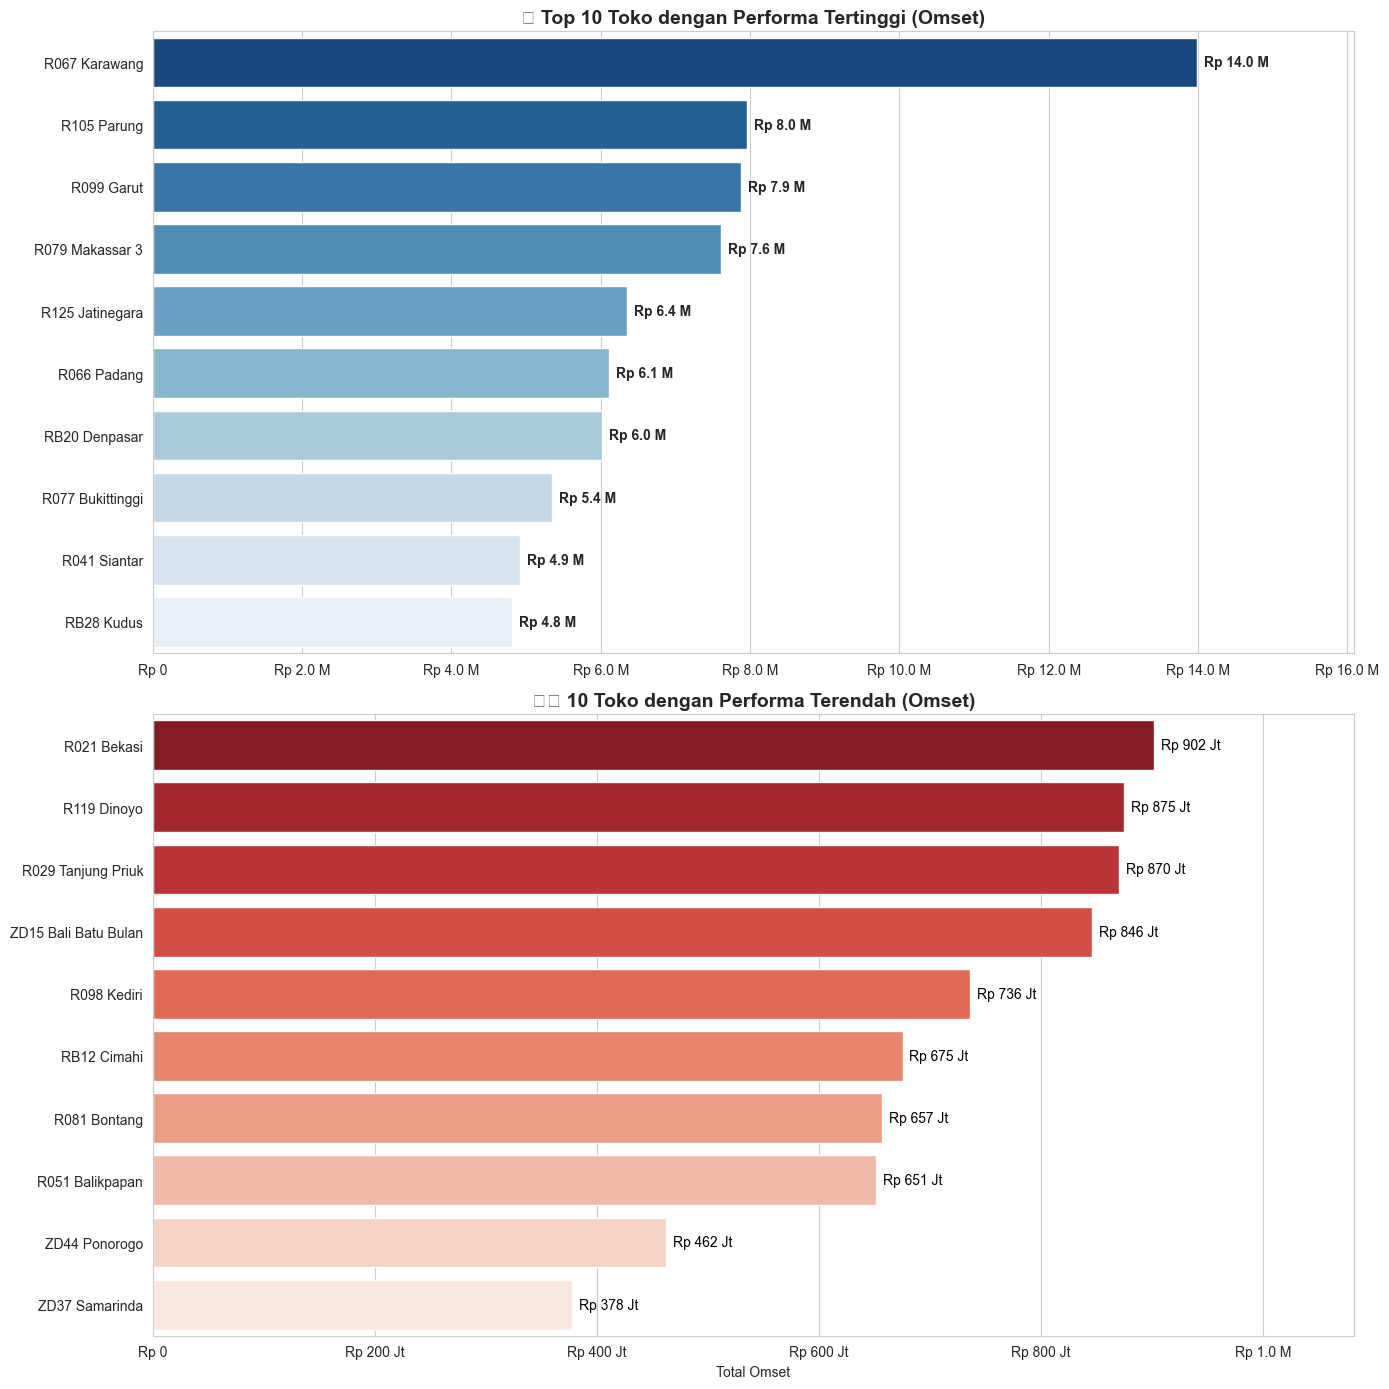

In [81]:
# Fungsi Helper untuk Label Angka (Agar Rapi) ---
def format_label_rupiah(x):
    if x >= 1e9:
        return f'Rp {x/1e9:.1f} M'  # Miliar
    elif x >= 1e6:
        return f'Rp {x/1e6:.0f} Jt' # Juta
    else:
        return f'Rp {x:,.0f}'

# Persiapan Data ---
# Rename Kolom untuk Visualisasi
store_perf = df_clean.groupby('Folder_Asal')['Omset_Paket'].sum().sort_values(ascending=False).reset_index()
store_perf = store_perf.rename(columns={'Folder_Asal': 'Nama Toko'})

# Plotting ---
fig, axes = plt.subplots(2, 1, figsize=(14, 14)) # Tinggi figure sedikit ditambah agar lega

# GRAFIK 1: TOP 10 ===
sns.barplot(
    data=store_perf.head(10), 
    x='Omset_Paket', 
    y='Nama Toko', 
    palette='Blues_r', 
    ax=axes[0]
)
axes[0].set_title('🏆 Top 10 Toko dengan Performa Tertinggi (Omset)', fontsize=14, fontweight='bold')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Menambahkan Label Angka di Ujung Bar Top 10
for container in axes[0].containers:
    # Buat list label yang sudah diformat
    labels = [format_label_rupiah(x) for x in container.datavalues]
    axes[0].bar_label(container, labels=labels, padding=5, fontsize=10, fontweight='bold')

# Perluas batas kanan agar label tidak terpotong
max_omset_top = store_perf.head(10)['Omset_Paket'].max()
axes[0].set_xlim(right=max_omset_top * 1.15) 


# GRAFIK 2: BOTTOM 10 ===
sns.barplot(
    data=store_perf.tail(10), 
    x='Omset_Paket', 
    y='Nama Toko', 
    palette='Reds_r', 
    ax=axes[1]
)
axes[1].set_title('⚠️ 10 Toko dengan Performa Terendah (Omset)', fontsize=14, fontweight='bold')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_xlabel('Total Omset')
axes[1].set_ylabel('')

# Menambahkan Label Angka di Ujung Bar Bottom 10
for container in axes[1].containers:
    labels = [format_label_rupiah(x) for x in container.datavalues]
    axes[1].bar_label(container, labels=labels, padding=5, fontsize=10, color='black')

# Perluas batas kanan agar label tidak terpotong
max_omset_bottom = store_perf.tail(10)['Omset_Paket'].max()
# Handle khusus jika max omset bottom sangat kecil (biar tidak error visual)
if max_omset_bottom > 0:
    axes[1].set_xlim(right=max_omset_bottom * 1.2) 

plt.tight_layout()
plt.show()

**Insight :** 
1. Toko yang memiliki pendapatan tertinggi murni dalam top up kartu secara berturut turut ialah R067 Karawang, R105 Parung, R099 Garut, R079 Makassar 3, R125 Jatinegara, R066 Padang, RB20 Denpasar, R077 Bukittinggi, R041 Siantar,dan RB28 Kudus.
2. Toko yang memiliki pendapatan terendah murni dalam top up kartu secara berturut turut ialah R021 Bekasi, R119 Dinoyo, R029 Tanjung Priuk, ZD15 Bali Batu Bulan, 098 Kediri, RB12 Cimahi, R081 Bontang, R051 Balikpapan, ZD44 Ponorogo, dan ZD37 Samarinda.

**2. Paket dengan 'Nominal_Grup' mana yang memiliki performa terbaik dan terburuk dalam dua tahun terakhir**

C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\1848290448.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\1848290448.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


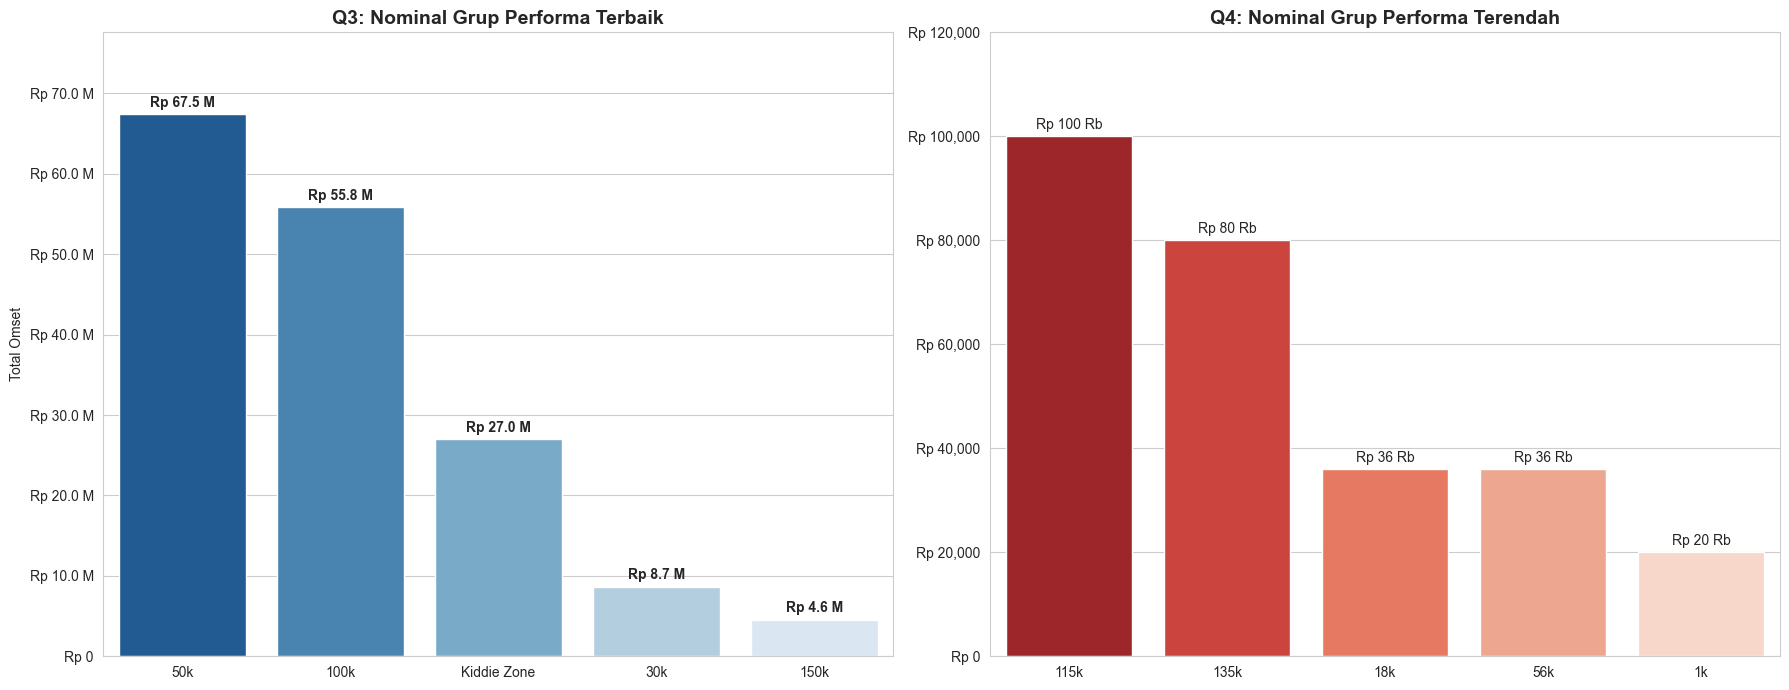

In [82]:
# Fungsi Helper untuk Label Angka Ringkas ---
def format_label_rupiah(x):
    if x >= 1e9:
        return f'Rp {x/1e9:.1f} M'  # Miliar
    elif x >= 1e6:
        return f'Rp {x/1e6:.0f} Jt' # Juta
    elif x >= 1e3:
        return f'Rp {x/1e3:.0f} Rb' # Ribu (jika nominal kecil)
    else:
        return f'Rp {x:,.0f}'

# Proses Data ---
# Ganti 'Lainnya' menjadi 'Kiddie Zone'
df_clean['Nominal_Grup'] = df_clean['Nominal_Grup'].replace('Lainnya', 'Kiddie Zone')

# Agregasi Ulang
df_nominal = df_clean.groupby('Nominal_Grup')['Omset_Paket'].sum().sort_values(ascending=False).reset_index()

# Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Tinggi ditambah sedikit agar label lega

#  Nominal Grup Terbaik (Top 5)
sns.barplot(
    data=df_nominal.head(5), 
    x='Nominal_Grup', 
    y='Omset_Paket', 
    palette='Blues_r', 
    ax=axes[0]
)
axes[0].set_title('Q3: Nominal Grup Performa Terbaik', fontsize=14, fontweight='bold')
axes[0].yaxis.set_major_formatter(formatter)
axes[0].set_xlabel('')
axes[0].set_ylabel('Total Omset')

# Tambahkan Label Angka (Top 5)
for container in axes[0].containers:
    # Buat list label format pendek
    labels = [format_label_rupiah(x) for x in container.datavalues]
    axes[0].bar_label(container, labels=labels, padding=3, fontsize=10, fontweight='bold')

# Atur batas atas Y agar label tidak kepotong
max_top = df_nominal.head(5)['Omset_Paket'].max()
axes[0].set_ylim(top=max_top * 1.15)


# GRAFIK 2: Nominal Grup Terendah (Bottom 5)
sns.barplot(
    data=df_nominal.tail(5), 
    x='Nominal_Grup', 
    y='Omset_Paket', 
    palette='Reds_r', 
    ax=axes[1]
)
axes[1].set_title('Q4: Nominal Grup Performa Terendah', fontsize=14, fontweight='bold')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Tambahkan Label Angka (Bottom 5)
for container in axes[1].containers:
    labels = [format_label_rupiah(x) for x in container.datavalues]
    axes[1].bar_label(container, labels=labels, padding=3, fontsize=10)

# Atur batas atas Y agar label tidak kepotong
max_bottom = df_nominal.tail(5)['Omset_Paket'].max()
if max_bottom > 0:
    axes[1].set_ylim(top=max_bottom * 1.2)

plt.tight_layout()
plt.show()

**Insight :** 
1. Nominal Top Up tertinggi pada transaksi berturut - turut ialah 50 ribu, 100 ribu, Kiddie Zone (tanpa nominal), 500 ribu, dan 30 ribu.
2. Nominal Top Up terendah pada transaksi berturut - turut ialah 75 ribu, 65 ribu, 15 ribu, 120 ribu, dan 5 ribu.

C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\1405079277.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kategori.head(10), x='Omset_Paket', y='Kategori_Paket', palette='Blues_r', ax=axes[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_21952\1405079277.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kategori.tail(10), x='Omset_Paket', y='Kategori_Paket', palette='Reds_r', ax=axes[1])


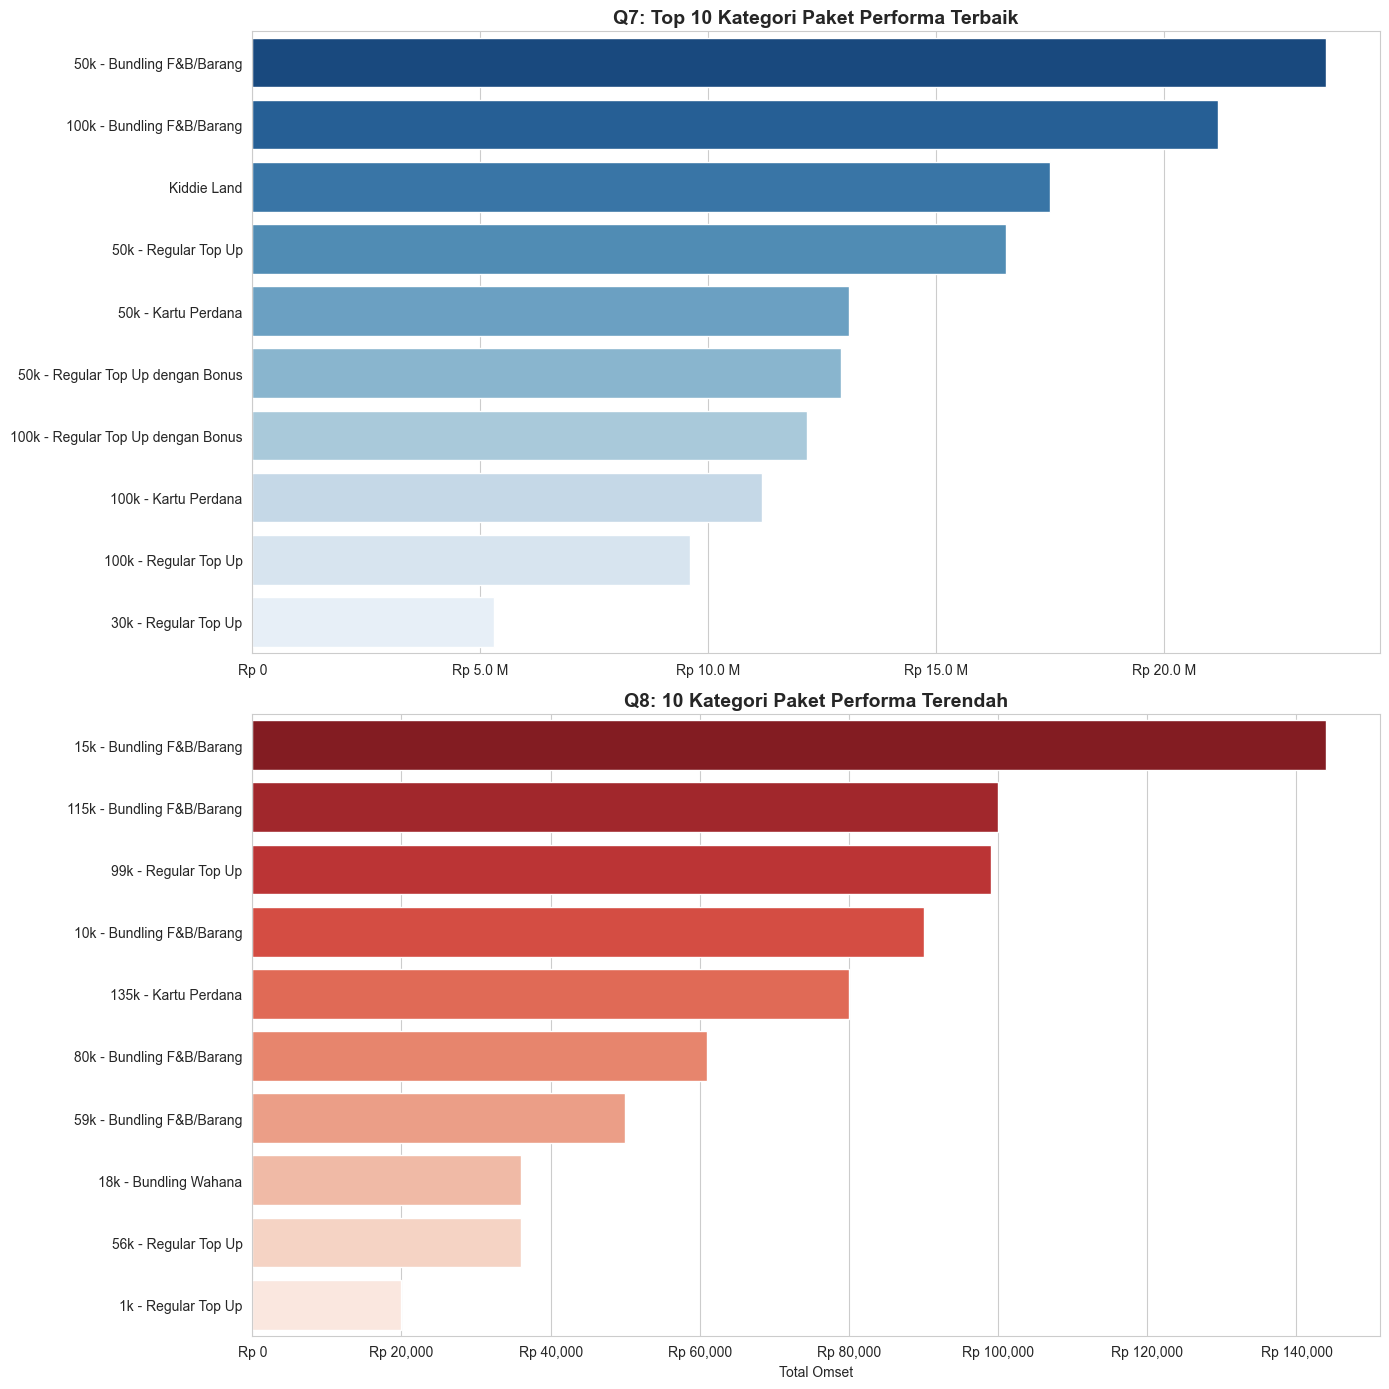

In [83]:
# --- AGREGASI DATA KATEGORI ---
df_kategori = df_clean.groupby('Kategori_Paket')['Omset_Paket'].sum().sort_values(ascending=False).reset_index()

# --- PLOTTING Q7 & Q8 ---
fig, axes = plt.subplots(2, 1, figsize=(14, 14)) # Disusun Atas-Bawah agar muat

# Q7: Top 10 Kategori Paket Terbaik
sns.barplot(data=df_kategori.head(10), x='Omset_Paket', y='Kategori_Paket', palette='Blues_r', ax=axes[0])
axes[0].set_title('Q7: Top 10 Kategori Paket Performa Terbaik', fontsize=14, fontweight='bold')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].set_ylabel('')
axes[0].set_xlabel('')

# Q8: Top 10 Kategori Paket Terendah
sns.barplot(data=df_kategori.tail(10), x='Omset_Paket', y='Kategori_Paket', palette='Reds_r', ax=axes[1])
axes[1].set_title('Q8: 10 Kategori Paket Performa Terendah', fontsize=14, fontweight='bold')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_ylabel('')
axes[1].set_xlabel('Total Omset')

plt.tight_layout()
plt.show()

Save df_clean ke excel

In [84]:

# ================= SAVE TO EXCEL =================
nama_file_output = "CLEAN_DATA_TRANSAKSI_FINAL.xlsx"

print(f"💾 Sedang menyimpan data ke {nama_file_output}...")

# Simpan ke Excel tanpa menyertakan index (nomor baris 0,1,2..)
df_clean.to_excel(nama_file_output, index=False)

print("✅ BERHASIL! File sudah tersimpan.")
print(f"Total Baris Data: {len(df_clean)}")
print(f"Kolom Tersedia: {list(df_clean.columns)}")


💾 Sedang menyimpan data ke CLEAN_DATA_TRANSAKSI_FINAL.xlsx...
✅ BERHASIL! File sudah tersimpan.
Total Baris Data: 35638
Kolom Tersedia: ['Folder_Asal', 'Nama_Toko_Internal', 'Tahun', 'Bulan', 'Tipe_Kartu', 'Paket', 'Frekuensi', 'Total_Sales', 'Masuk_Kredit', 'Omset_Paket', 'Bulan_Angka', 'Tanggal', 'Nominal_Grup', 'Tipe_Grup', 'Kategori_Paket']
